In [2]:
import sys
 
# add python folder
sys.path.insert(0, 'python')

import matplotlib.pyplot as plt
import numpy as np
import threading
import time
import logging
import pytz
import pandas as pd
import numpy as np
from embeddingStructure import embeddingStructure
from batch import batch
import matplotlib.pyplot as plt
import utils as group2
from tqdm import  tqdm


In [3]:
# Calculate some cosine similaraties to test ploting on a polar scale
format = "%(asctime)s: %(message)s"
logging.basicConfig(format=format, level=logging.INFO, datefmt="%H:%M:%S")
logging.info("Main    : Starting")

filename = "/home/ubuntu/sampled_embeddings.csv"

column_names = [
    'data'
]

batch_01 = batch()
print("----- batch_01 -----")
x = threading.Thread(target = batch_01.load, args=(filename, 0, 10_000))
x.start()
x.join()
logging.info("Main : all done")

# Get all embedding Vectors for the batch
vector_list = batch_01.items
print("got ", len(vector_list), "vectors")
for idx, vector_obj in enumerate(vector_list):
    if(len(vector_obj.data) != 1024):
        print("YEEEEEEEEET ", vector_list.pop(idx))


09:43:27: Main    : Starting
09:43:27: batch    : starting section
09:43:27: batch    : line found


----- batch_01 -----


09:43:45: batch    : section done
09:43:45: Main : all done


got  10000 vectors


In [4]:
# Coppy all vector data in np array
np_vectors_list = []
for vector_obj in vector_list:
    np_vectors_list.append(vector_obj.data)
np_vectors_list = np.array(np_vectors_list)

In [4]:


# Choose 1 random metoid
random_index = np.random.randint(len(np_vectors_list) - 1)
metoid_1 = np_vectors_list[ random_index ]

# Pop out the metoid from the whole group
np_vectors_list = np.vstack( (np_vectors_list[:random_index], np_vectors_list[random_index + 1:]))


# print("Popped a metoid, shape: ", metoid.shape)
# metoid_2 = vector_list.pop(np.random.randint(len(vector_list) - 1)).data
# metoid_2 = np.array(metoid_1)

def metoid_1_cos( given_vector_Object ):
    return group2.cosineSimilarity( np.array(given_vector_Object.data), vectorB=metoid_1)

# def metoid_2_cos( given_vector_Object):
#     return group2.cosineSimilarity( np.array(given_vector_Object.data), vectorB=metoid_2)

# randomly cluster vectors
random_index = np.random.randint(len(vector_list))

# initial cos sum:
list_of_cos_similarities = list(map( metoid_1_cos, np_vectors_list))
# list_of_cos_similarities = list(map(metoid_1_cos, vector_list[:random_index])) + list(map(metoid_2_cos, vector_list[random_index:]))

initial_cos_sum = sum(list_of_cos_similarities)
print("initial cos sum: ", initial_cos_sum)


# start_time = time.time()
# list_of_cos_similarities = list( map(metoid_1_cos, vector_list))
# sum_all_cos_similarities = sum(list_of_cos_similarities)
# end_time = time.time()
# print("Cos Similarities calculated in: ", end_time - start_time, "s")


initial cos sum:  4493.576238468289


min similarity:  0.11874686
max similarity  0.9475512


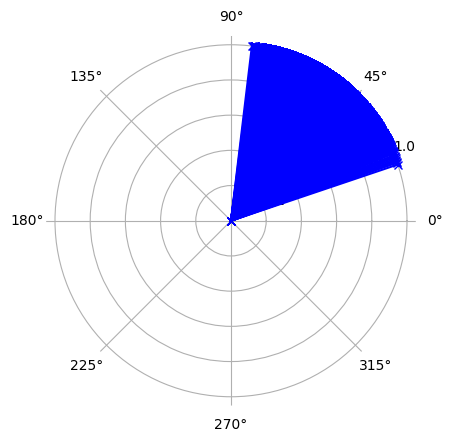

In [5]:

# Get 100 random cosines similarities
# random_similarities = np.random.choice([1,2,3,4], 2, replace=False)
# print(random_similarities)
random_similarities = np.random.choice(list_of_cos_similarities, 300, replace=False)
print("min similarity: ", np.min(list_of_cos_similarities))
print("max similarity ", np.max(list_of_cos_similarities))
# Plot all wrt to the metoid. Metoid in polar coords is [0,1] [radiants, radius]

# fig, ax = plt.subplots()
polar_ax = plt.subplot(111, polar=True)
polar_ax.spines['polar'].set_visible(False)

# metoid set as the x axis line (since we only have 1 now)
polar_metoid = [0,0]

# transfer cos sim to polar coordinates
polar_cos_similarities = []
for cos_sim in list_of_cos_similarities:
    # convert cosine similarities to radians
    polar_radian = np.arccos( cos_sim )
    polar_cos_similarities.append( polar_radian )

# plot
for polar_cos in polar_cos_similarities:
    x_value = [polar_metoid[0], polar_cos ]
    y_value = [polar_metoid[1], 1 ]
    plt.plot(x_value, y_value, 'bx', linestyle='-')
plt.show()


In [5]:
# Use importlib to update changes of imported files without restarting kernel
import importlib
imported_module = importlib.import_module("MetoidCluster")
importlib.reload(imported_module)
from MetoidCluster import MetoidCluster

In [6]:

# Calculate some cosine similaraties to test ploting on a polar scale
format = "%(asctime)s: %(message)s"
logging.basicConfig(format=format, level=logging.INFO, datefmt="%H:%M:%S")
logging.info("Main    : Starting")

filename = "/home/ubuntu/sampled_embeddings.csv"

column_names = [
    'data'
]

batch_01 = batch()
print("----- batch_01 -----")
x = threading.Thread(target = batch_01.load, args=(filename, 0, 10_000))
x.start()
x.join()
logging.info("Main : all done")

# Get all embedding Vectors for the batch
embeddings_list = batch_01.items
print("got ", len(embeddings_list), "vectors")

# Filter out vectors which were not read correct
for idx, vector_obj in enumerate(embeddings_list):
    if(len(vector_obj.data) != 1024):
        print("YEEEEEEEEET ", embeddings_list.pop(idx))

# transform rest of vectors to np arrays
np_embeddings_list = []
for vector_obj in embeddings_list:
    np_embeddings_list.append(np.array(vector_obj.data))
np_embeddings_list = np.array(np_embeddings_list)



09:44:25: Main    : Starting
09:44:25: batch    : starting section
09:44:25: batch    : line found


----- batch_01 -----


09:44:29: batch    : section done
09:44:29: Main : all done


got  10000 vectors


In [7]:

# Make working coppy of embeddings
np_vectors_list = np_embeddings_list


In [8]:

# Choose 1 random metoid
random_index = np.random.randint(len(np_vectors_list) - 1)
metoid_1 = np_vectors_list[ random_index ]

# Pop out the metoid from the whole group
np_vectors_list = np.vstack( (np_vectors_list[:random_index], np_vectors_list[random_index + 1:]))

# Calculate cosine sum with single metoid
cluster1 = MetoidCluster(metoid_1, np_vectors_list)
cluster1.sum_all_cos_similarities()
one_metoid_sum = cluster1.get_cos_similarity_sum()
print('total number of vectors: ', len(np_vectors_list))
print('cos sum with one metoid: ', one_metoid_sum)


total number of vectors:  9999
cos sum with one metoid:  3939.7915202975273


In [9]:

# Create second metoid
random_index = np.random.randint(len(np_vectors_list) - 1)
metoid_2 = np_vectors_list[ random_index ]

# Pop out metoid from the whole group
np_vectors_list = np.vstack( (np_vectors_list[:random_index], np_vectors_list[random_index + 1:]) )


In [10]:
# Randomize the vectors list
randomized_vectors_list = np_vectors_list
np.random.shuffle(randomized_vectors_list)



In [25]:
# Create two metoid clusters. Use the randomly selected vectors as first metoids, then use random vectors for each cluster
cluster_1 = randomized_vectors_list[                               : int(len(randomized_vectors_list)/2) ]
cluster_2 = randomized_vectors_list[ int(len(randomized_vectors_list)/2): ]


metoid_cluster1 = MetoidCluster(metoid_1, cluster_1)
metoid_cluster2 = MetoidCluster(metoid_2, cluster_2)

metoid_cluster1.sum_all_cos_similarities()
metoid_cluster2.sum_all_cos_similarities()
# go through vectors of firstr cluster and distribute
print("cos sum of cluster 1: ", metoid_cluster1.get_cos_similarity_sum())
print("cos sum of cluster 2: ", metoid_cluster2.get_cos_similarity_sum())

cos sum of cluster 1:  1966.7090955153108
cos sum of cluster 2:  1780.198826737702


In [26]:
print("size of cluster:", len(metoid_cluster1.get_cluster()))

size of cluster: 4999


In [1]:
# # Compare the vectors from each cluster, and assign to different cluster if better. Randomly choose
# from tqdm import tqdm

# def compare_vector_clustering( initial_cluster, comparing_cluster):
#     switch_to_comparing = []
#     switch_to_initial = []
#     for idx, np_vector in enumerate(initial_cluster.get_cluster()):
#         # Goes through initial_cluster vectors
#         initial_cos_sim = group2.cosineSimilarity( initial_cluster.get_metoid(), np_vector )
#         comparing_cos_sim = group2.cosineSimilarity( comparing_cluster.get_metoid(), np_vector)
#         if(comparing_cos_sim > initial_cos_sum):
#             # switch vector
#             switch_to_comparing.append(initial_cluster.pop_vec_from_cluster(idx))

#     for idx, np_vector in enumerate(comparing_cluster.get_cluster()):
#         # goes through comparing_cluster vectors
#         initial_cos_sim = group2.cosineSimilarity( initial_cluster.get_metoid(), np_vector )
#         comparing_cos_sim = group2.cosineSimilarity( comparing_cluster.get_metoid(), np_vector)
#         if(comparing_cos_sim < initial_cos_sum):
#             # switch vector
#             switch_to_initial.append(comparing_cluster.pop_vec_from_cluster(idx))

#     # Go through list of vectors that need switching and switch them
#     for vector in tqdm(switch_to_initial):
#         initial_cluster.add_vec_to_cluster(vector)

#     for vector in tqdm(switch_to_comparing):
#         comparing_cluster.add_vec_to_cluster(vector) 
      
# compare_vector_clustering(metoid_cluster1, metoid_cluster2)

NameError: name 'metoid_cluster1' is not defined

In [33]:
# Compare and switch out vectors from the first cluster
def switch_vectors(first_cluster, second_cluster):
    indecies_to_switch = []
    for idx, vector in tqdm(enumerate(first_cluster.get_cluster())):
        first_cos_sim = group2.cosineSimilarity( first_cluster.get_metoid(), vector)
        second_cos_sim = group2.cosineSimilarity( second_cluster.get_metoid(), vector)
        if(second_cos_sim > first_cos_sim):
            indecies_to_switch.append(idx)
    index_sum = 0
    for index in tqdm(indecies_to_switch):
        #all indecies have to be adjusted by -1 to account for the removing of vectors
        index -= index_sum
        vector = first_cluster.pop_vec_from_cluster(index)
        second_cluster.add_vec_to_cluster(vector)
        index_sum += 1

# switch_vectors(metoid_cluster1, metoid_cluster2)
switch_vectors(metoid_cluster2, metoid_cluster1)


3587it [00:00, 39637.08it/s]
0it [00:00, ?it/s]


In [34]:
# Check that the cosine sum has gone up
metoid_cluster1.sum_all_cos_similarities()
metoid_cluster2.sum_all_cos_similarities()
# go through vectors of firstr cluster and distribute
print("cos sum of cluster 1: ", metoid_cluster1.get_cos_similarity_sum())
print("cos sum of cluster 2: ", metoid_cluster2.get_cos_similarity_sum())

cos sum of cluster 1:  2824.1477877646685
cos sum of cluster 2:  1396.236639559269


/tmp/ipykernel_55960/1184659261.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(plotNX, plotNY, position, polar=True)


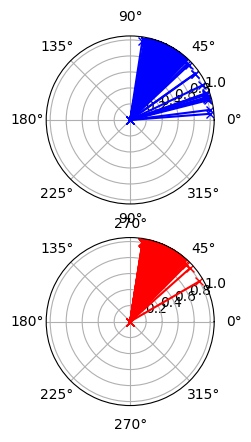

In [31]:
polar_ax = plt.subplot(111, polar=True)
polar_ax.spines['polar'].set_visible(False)

# transfer cos sim to polar coordinates
def polar_plot_cosines(plotNX, plotNY, position, cosine_list, color_string):
    polar_cos_similarities = []
    for cos_sim in cosine_list:
        # convert cosine similarities to radians
        polar_radian = np.arccos( cos_sim )
        polar_cos_similarities.append( polar_radian )

    # plot
    for polar_cos in polar_cos_similarities:
        x_value = [0, polar_cos ]
        y_value = [0, 1 ]
        plt.subplot(plotNX, plotNY, position, polar=True)
        plt.plot(x_value, y_value, color_string, linestyle='-')

cluster_1_cosines = metoid_cluster1.get_cluster_similarities()
cluster_2_cosines = metoid_cluster2.get_cluster_similarities()

polar_plot_cosines(2,1,1, cluster_1_cosines, 'bx')
polar_plot_cosines(2,1,2, cluster_2_cosines, 'rx')

plt.show()

0